# RT-DETR Training Notebook - RGB

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/samy/shivam/dsr_project/Project_files


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.13.2 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4090, 24085MiB)
Setup complete ✅ (32 CPUs, 125.6 GB RAM, 1067.6/1832.2 GB disk)


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Setup complete ✅ (32 CPUs, 125.5 GB RAM, 1769.8/1832.2 GB disk)


## Load Pretrained RT-DETR_l model and Validate

100%|██████████| 63.4M/63.4M [00:05<00:00, 12.0MB/s]



0: 640x640 1 car, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


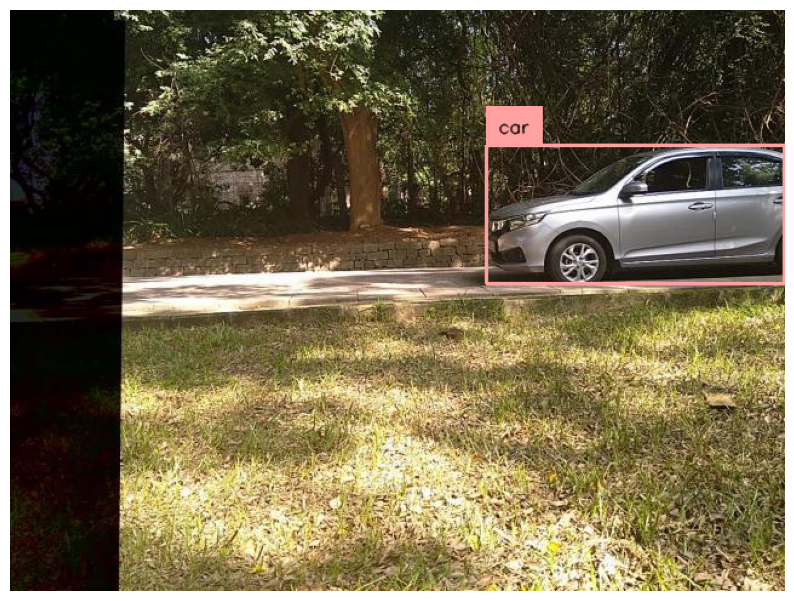

In [3]:
from ultralytics import RTDETR
from PIL import Image
import supervision as sv

# Load the pretrained RT-DETR model (Large variant)
model = RTDETR('rtdetr-l.pt')

# Open a test image
image = Image.open('/home/user/Shivam/dsr_project/dataset/RGB_od/images/test/flir_1662.jpg')

# Run inference
result = model.predict(image, conf=0.25)[0]

# Visualize detections
detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)
sv.plot_image(annotated_image, size=(10, 10))


## Training RT-DETR_l Model

In [3]:
from ultralytics import RTDETR

# Load pretrained RT-DETR model (Large version)
model = RTDETR('rtdetr-l.pt')

# Train on your dataset
results = model.train(
    data="/home/user/Shivam/dsr_project/dataset/RGB_od/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    name='train_l',
    project="/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb",
    workers=4,
    verbose=True
    
)


New https://pypi.org/project/ultralytics/8.3.126 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=/home/user/Shivam/dsr_project/dataset/RGB_od/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb, name=train_l, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

Overriding model.yaml nc=80 with nc=15
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5,

train: Scanning /home/user/Shivam/dsr_project/dataset/RGB_od/labels/train.cache... 21816 images, 669 backgrounds, 1 corrupt: 100%|██████████| 21816/21816 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/user/Shivam/dsr_project/dataset/RGB_od/images/train/000003.jpg: ignoring corrupt image/label: could not convert string to float: 'camouflage_soldier.334375'
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 49241. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/user/Shivam/dsr_project/dataset/RGB_od/labels/val.cache... 6233 images, 205 backgrounds, 0 corrupt: 100%|██████████| 6233/6233 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 13925. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_l/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_l
Starting training for 100 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      1/100      14.6G     0.5623      3.463     0.3202         47        640: 100%|██████████| 1364/1364 [05:12<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.62it/s]


                   all       6233      13925      0.747       0.47      0.472      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      2/100      13.4G     0.4901     0.7523     0.2472         19        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.56it/s]


                   all       6233      13925      0.741      0.521      0.542      0.343

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      3/100      13.7G     0.5975     0.6993     0.2641         15        640: 100%|██████████| 1364/1364 [05:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.56it/s]


                   all       6233      13925      0.756       0.48      0.517      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      4/100      13.4G     0.6516      0.685     0.2799         27        640: 100%|██████████| 1364/1364 [05:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.49it/s]


                   all       6233      13925      0.736      0.518      0.546      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      5/100      13.7G     0.6288     0.6708     0.2686         15        640: 100%|██████████| 1364/1364 [05:07<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.49it/s]


                   all       6233      13925      0.773      0.553      0.588      0.373

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      6/100      13.6G     0.6175     0.6548     0.2622         15        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.48it/s]


                   all       6233      13925      0.785      0.562      0.607      0.394

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      7/100      13.7G     0.6074     0.6444      0.255         16        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.47it/s]


                   all       6233      13925      0.777      0.584       0.62      0.402

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      8/100      13.8G     0.6087     0.6387     0.2534         49        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.48it/s]


                   all       6233      13925        0.7      0.558      0.597      0.361

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      9/100      13.7G     0.5998     0.6378     0.2512         25        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.48it/s]


                   all       6233      13925      0.711      0.603      0.639      0.419

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     10/100      13.6G     0.5876     0.6316     0.2439         27        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.45it/s]


                   all       6233      13925      0.803      0.616      0.657      0.442

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     11/100      13.6G      0.579     0.6264     0.2415         20        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.47it/s]


                   all       6233      13925      0.802      0.615      0.646      0.437

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     12/100      13.5G     0.5761     0.6253       0.24         16        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.45it/s]


                   all       6233      13925      0.798      0.628      0.659      0.449

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     13/100      13.5G     0.5698     0.6194     0.2393         23        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.801      0.641      0.674      0.467

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     14/100      13.8G     0.5586     0.6211     0.2374         20        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.42it/s]


                   all       6233      13925      0.816      0.639      0.674      0.458

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     15/100      13.6G     0.5487     0.6257     0.2311         18        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.44it/s]


                   all       6233      13925      0.814      0.644      0.681      0.478

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     16/100      13.7G     0.5519     0.6147      0.233         35        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.43it/s]


                   all       6233      13925      0.818       0.64      0.701      0.485

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     17/100      13.6G     0.5351     0.6111     0.2295         42        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.44it/s]


                   all       6233      13925      0.804      0.657       0.69      0.483

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     18/100      13.6G     0.5314       0.61     0.2235         14        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.44it/s]


                   all       6233      13925      0.807      0.668      0.701      0.487

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     19/100      13.6G     0.5338     0.6068     0.2267          9        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.44it/s]


                   all       6233      13925      0.732      0.672      0.702      0.488

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     20/100      13.8G     0.5363      0.606     0.2252         66        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.44it/s]


                   all       6233      13925      0.829      0.668      0.712      0.497

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     21/100      13.8G     0.5314     0.6009     0.2236         20        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.42it/s]


                   all       6233      13925      0.818      0.678      0.729      0.521

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     22/100      13.8G     0.5336     0.6033     0.2261         27        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.44it/s]


                   all       6233      13925      0.819      0.675      0.711        0.5

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     23/100      13.6G     0.5228      0.602     0.2194         38        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.45it/s]


                   all       6233      13925      0.752       0.73      0.732      0.511

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     24/100      14.5G     0.5254     0.5978     0.2192         32        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.42it/s]


                   all       6233      13925       0.81      0.679      0.714      0.505

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     25/100      13.6G     0.5126     0.5999     0.2172         25        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.831      0.681      0.742      0.531

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     26/100      13.8G     0.5034     0.5994     0.2141         50        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.43it/s]


                   all       6233      13925      0.732      0.734      0.734      0.524

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     27/100      13.8G     0.5148     0.5982     0.2183         23        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.821      0.693      0.728      0.523

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     28/100      13.5G     0.5094     0.5993     0.2164         17        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.42it/s]


                   all       6233      13925      0.742      0.696      0.733      0.527

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     29/100      13.8G     0.5034     0.5931      0.217         38        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.42it/s]


                   all       6233      13925      0.829      0.703      0.735      0.531

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     30/100      13.7G      0.508     0.5936     0.2163         27        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.827      0.694      0.734      0.529

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     31/100      13.8G     0.5165     0.5933     0.2179         16        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.733      0.749      0.742      0.538

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     32/100      12.8G     0.5035     0.5911     0.2151         23        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.42it/s]


                   all       6233      13925      0.726      0.755      0.744      0.537

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     33/100      13.6G     0.4901     0.5851     0.2086         20        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.43it/s]


                   all       6233      13925      0.826      0.715      0.744       0.54

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     34/100      13.7G     0.5086     0.5918     0.2139         31        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.822      0.718      0.745      0.539

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     35/100      13.6G     0.4914     0.5873     0.2117         30        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.831      0.713      0.745      0.541

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     36/100        14G     0.4934     0.5841     0.2103         20        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.41it/s]


                   all       6233      13925      0.831       0.72      0.746      0.542

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     37/100      13.6G     0.4679     0.5809     0.2051         23        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.746       0.72       0.75      0.542

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     38/100      13.8G     0.4825      0.581       0.21         26        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.42it/s]


                   all       6233      13925       0.78      0.753      0.767      0.549

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     39/100      13.7G     0.5028      0.582     0.2138         18        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.758      0.775      0.766      0.553

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     40/100      13.6G     0.4776     0.5749     0.2064         25        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.765      0.773      0.766      0.553

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     41/100      13.6G     0.4728     0.5752     0.2057         28        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.794      0.765      0.769      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     42/100      13.9G     0.4886     0.5868     0.2076         26        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.803       0.76      0.769      0.555

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     43/100      13.6G     0.4599     0.5628     0.1989         29        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.807      0.753      0.767      0.553

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     44/100      13.5G     0.4623     0.5639     0.1998         26        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.824      0.747       0.77      0.555

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     45/100      13.4G     0.4645      0.568     0.2014         24        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.828      0.747      0.771      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     46/100      13.8G      0.464     0.5681     0.1991         33        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.825      0.749      0.771      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     47/100      13.8G     0.4557     0.5643     0.1968         19        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.804      0.758      0.771      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     48/100      13.8G     0.4507     0.5592     0.1943         16        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.41it/s]


                   all       6233      13925      0.768      0.767      0.771      0.555

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     49/100      13.4G     0.4575     0.5573     0.1986         19        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.745      0.774      0.771      0.554

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     50/100      13.6G     0.4524       0.56     0.1953         48        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.746      0.773       0.76      0.552

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     51/100      13.6G     0.4277     0.5472      0.187         30        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.841      0.723      0.754      0.553

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     52/100      13.6G     0.4389     0.5492     0.1899         13        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.842      0.723      0.756      0.554

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     53/100      13.6G     0.4289     0.5446     0.1882         16        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.843      0.721      0.757      0.555

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     54/100      13.8G     0.4514     0.5593     0.1983         22        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.842      0.723      0.757      0.556

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     55/100      13.7G     0.4146     0.5424     0.1863         28        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.734      0.761      0.761      0.558

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     56/100      13.8G     0.4368     0.5476     0.1892         20        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.733      0.763      0.761      0.558

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     57/100      13.6G     0.4176     0.5398     0.1854         38        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.735      0.765      0.761      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     58/100      13.7G     0.4189     0.5369     0.1862         35        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.36it/s]


                   all       6233      13925      0.737      0.766      0.762      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     59/100      13.7G     0.4242     0.5479     0.1901         14        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.736      0.766      0.762      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     60/100      13.6G     0.4216     0.5473     0.1915         41        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.731      0.768      0.763      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     61/100      13.4G      0.388     0.5303     0.1752         16        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.40it/s]


                   all       6233      13925      0.728      0.768      0.762      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     62/100      13.6G     0.3797     0.5219     0.1781         35        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.43it/s]


                   all       6233      13925      0.847      0.723      0.757      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     63/100      13.6G      0.388     0.5211     0.1756         23        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.32it/s]


                   all       6233      13925      0.849      0.724      0.758      0.558

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     64/100      13.4G     0.3929     0.5276     0.1774         11        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.848      0.726      0.758      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     65/100      13.7G     0.4097     0.5319     0.1834         25        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.845      0.731       0.76       0.56

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     66/100      13.6G     0.3862     0.5171     0.1756         44        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.846      0.731      0.761       0.56

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     67/100      13.3G     0.3869     0.5213      0.175         23        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.845      0.733      0.761       0.56

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     68/100      13.6G     0.3649     0.5128     0.1695         14        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.845      0.733      0.761       0.56

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     69/100      13.5G     0.3865     0.5233     0.1736         21        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.842      0.733      0.759      0.561

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     70/100      13.7G     0.4137     0.5239     0.1802         23        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.841      0.733      0.758      0.561

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     71/100      13.8G     0.4051     0.5271     0.1792         18        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.838      0.735      0.758      0.561

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     72/100      13.6G     0.3872     0.5277     0.1743         55        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.838      0.736       0.76      0.562

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     73/100      13.8G     0.4072     0.5376     0.1824         26        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.36it/s]


                   all       6233      13925       0.84      0.735       0.76      0.562

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     74/100      13.6G     0.4289     0.5264     0.1872         15        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.33it/s]


                   all       6233      13925      0.842      0.733      0.761      0.562

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     75/100      13.4G      0.417     0.5468     0.1837         30        640: 100%|██████████| 1364/1364 [05:11<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.848      0.731       0.76      0.563

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     76/100      13.8G     0.3897     0.5472     0.1759         17        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.34it/s]


                   all       6233      13925      0.847      0.729      0.759      0.563

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     77/100      13.5G     0.3763     0.5663     0.1735         24        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.36it/s]


                   all       6233      13925      0.847      0.731      0.759      0.563

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     78/100      13.7G     0.3872     0.5456     0.1768         58        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.848      0.731       0.76      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     79/100      13.8G     0.3818     0.5429     0.1724         17        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.36it/s]


                   all       6233      13925      0.845      0.734       0.76      0.563

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     80/100      13.5G     0.3802     0.5217     0.1699         19        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.31it/s]


                   all       6233      13925      0.761      0.733       0.76      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     81/100      13.4G     0.3763     0.5496     0.1724         72        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.762      0.732       0.76      0.565

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     82/100      13.8G     0.3742     0.5622     0.1704         36        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.37it/s]


                   all       6233      13925      0.761      0.732      0.759      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     83/100      13.6G     0.3648     0.5592     0.1685         34        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.843      0.733      0.758      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     84/100      13.4G     0.3734     0.5482     0.1671         25        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.842      0.734      0.757      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     85/100      13.4G     0.3662     0.6235     0.1664         26        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.844      0.734      0.758      0.565

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     86/100      13.5G     0.3567     0.5289     0.1638         31        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.846      0.732      0.755      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     87/100      13.7G     0.3502     0.5334     0.1623         45        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.845       0.73      0.755      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     88/100      13.4G     0.3553     0.5937     0.1634         19        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.846      0.729      0.754      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     89/100      13.6G     0.3413     0.5232     0.1551         30        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.34it/s]


                   all       6233      13925      0.849      0.729      0.755      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     90/100      13.7G     0.3313     0.4935     0.1558         27        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925       0.85      0.728      0.755      0.565
Closing dataloader mosaic

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     91/100      13.6G     0.3052     0.5103     0.1431         14        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.32it/s]


                   all       6233      13925      0.849       0.73      0.755      0.565

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     92/100      13.8G     0.3082     0.5006     0.1435         10        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.39it/s]


                   all       6233      13925      0.849      0.731      0.756      0.566

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     93/100      13.4G     0.2827     0.4316     0.1316         17        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.848      0.731      0.755      0.566

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     94/100      13.6G     0.2877     0.4501     0.1327         18        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.35it/s]


                   all       6233      13925      0.846      0.731      0.756      0.566

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     95/100      13.4G     0.2743     0.4119     0.1258         14        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.38it/s]


                   all       6233      13925      0.847      0.729      0.758      0.567

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     96/100      13.7G     0.2798     0.4532     0.1265         22        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.31it/s]


                   all       6233      13925      0.849      0.729      0.758      0.567

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     97/100      13.4G     0.2512     0.3675      0.116          8        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.29it/s]


                   all       6233      13925       0.85      0.729      0.758      0.567

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     98/100      13.9G     0.2533      0.381     0.1144         11        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.30it/s]


                   all       6233      13925       0.85      0.727      0.757      0.567

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     99/100      13.8G     0.2452     0.3658     0.1124          7        640: 100%|██████████| 1364/1364 [05:09<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.34it/s]


                   all       6233      13925      0.764      0.726      0.755      0.566

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    100/100      13.4G     0.2395     0.3569     0.1101          8        640: 100%|██████████| 1364/1364 [05:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:23<00:00,  8.33it/s]


                   all       6233      13925      0.764      0.726      0.755      0.566

100 epochs completed in 9.272 hours.
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_l/weights/last.pt, 66.2MB
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_l/weights/best.pt, 66.2MB

Validating /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_l/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
rt-detr-l summary: 502 layers, 32,014,565 parameters, 0 gradients, 103.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:22<00:00,  8.72it/s]


                   all       6233      13925      0.847       0.73      0.758      0.567
                Person        418        807      0.902      0.781      0.909      0.606
                   Car        530       2658      0.777      0.856      0.893      0.702
         Vehicle_Other        314        403      0.847      0.886      0.891      0.698
               Soldier        642       1501      0.793      0.614      0.695      0.452
          Soldier_Camo        806       1069      0.902      0.917      0.938      0.656
      Vehicle_Military        354        775      0.673      0.609      0.574      0.438
                  Tank       1995       3939      0.854      0.889      0.897      0.665
             Artillery         73        103      0.791      0.583      0.574      0.422
                Weapon        222        361       0.86      0.834      0.887      0.687
              Trenches          4          4          1          0      0.049     0.0154
             Air_Asse

## Testing RT-DERT_l Model

In [4]:
from ultralytics import RTDETR

# Load fine-tuned model
model = RTDETR('/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_l/weights/best.pt')

# Run evaluation on test set
metrics = model.val(
    split='test',
    name='test_l',
    project="/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_rgb"
)

# Show test metrics
print(metrics)


Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)


rt-detr-l summary: 502 layers, 32,014,565 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /home/user/Shivam/dsr_project/dataset/RGB_od/labels/test.cache... 3117 images, 89 backgrounds, 0 corrupt: 100%|██████████| 3117/3117 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:18<00:00, 10.28it/s]


                   all       3117       7164      0.836      0.789      0.818      0.618
                Person        207        427      0.855      0.758      0.873      0.572
                   Car        266       1390      0.764      0.839      0.877      0.689
         Vehicle_Other        141        214      0.829      0.841      0.841      0.658
               Soldier        369        837      0.847      0.587      0.689      0.453
          Soldier_Camo        403        524      0.929      0.922      0.965      0.683
      Vehicle_Military        181        414      0.699      0.661      0.648      0.493
                  Tank        996       1954      0.872      0.915      0.912      0.686
             Artillery         41         76      0.727      0.526      0.468      0.325
                Weapon         91        118      0.896      0.881      0.921      0.743
             Air_Asset        491       1007      0.952      0.836      0.912      0.753
           Naval_Asse

## Load Pretrained RT-DETR_x model and Validate

In [5]:
import urllib.request

# URL of the model
url = "https://github.com/ultralytics/assets/releases/download/v8.3.0/rtdetr-x.pt"
save_path = "/home/user/Shivam/dsr_project/Project_files/rtdetr-x.pt"

# Download the model
urllib.request.urlretrieve(url, save_path)
print("✅ rtdetr-x.pt downloaded successfully.")

✅ rtdetr-x.pt downloaded successfully.



0: 640x640 1 car, 17.3ms
Speed: 1.6ms preprocess, 17.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


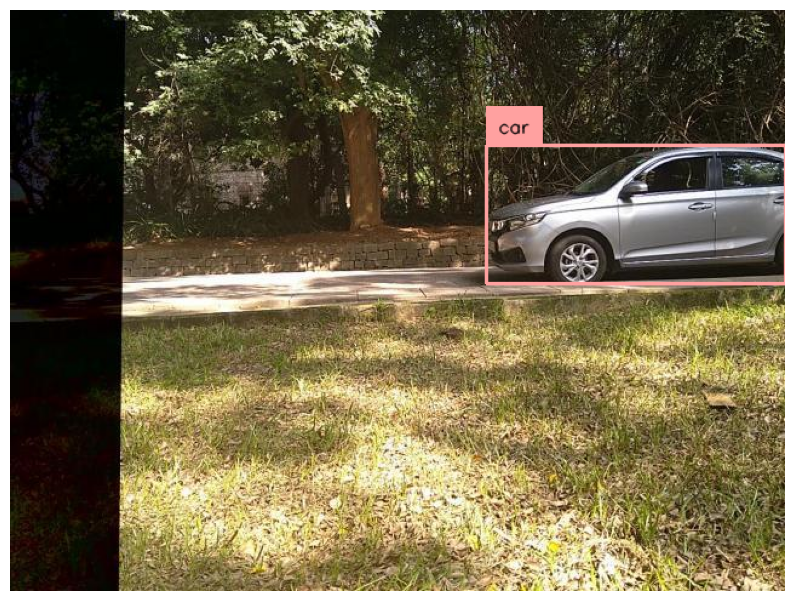

In [2]:
from ultralytics import RTDETR
from PIL import Image
import supervision as sv

# Load the pretrained RT-DETR model 
model = RTDETR('rtdetr-x.pt')

# Open a test image
image = Image.open('/home/user/Shivam/dsr_project/dataset/RGB_od/images/test/flir_1662.jpg')

# Run inference
result = model.predict(image, conf=0.25)[0]

# Visualize detections
detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)
sv.plot_image(annotated_image, size=(10, 10))


## Training RT-DETR_x Model

In [5]:
from ultralytics import RTDETR

# Load pretrained RT-DETR model 
model = RTDETR('rtdetr-x.pt')

# Train on your dataset
results = model.train(
    data="/home/samy/shivam/dsr_project/dataset/RGB_od/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    name='train_x',
    project="/home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb",
    workers=4,
    verbose=True
    
)

New https://pypi.org/project/ultralytics/8.3.141 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.13.2 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4090, 24085MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-x.pt, data=/home/samy/shivam/dsr_project/dataset/RGB_od/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb, name=train_x, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

100%|██████████| 755k/755k [00:00<00:00, 5.33MB/s]

Overriding model.yaml nc=80 with nc=15
WARNING ⚠️ no model scale passed. Assuming scale='x'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25792  ultralytics.nn.modules.block.HGStem          [3, 32, 64]                   
  1                  -1  6    259200  ultralytics.nn.modules.block.HGBlock         [64, 64, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6   1248256  ultralytics.nn.modules.block.HGBlock         [128, 128, 512, 3, 6]         
  4                  -1  6   1788928  ultralytics.nn.modules.block.HGBlock         [512, 128, 512, 3, 6, False, True]
  5                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  6                  -1  6   2079232  ultralytics.nn.modules.block.HGBlock         [512, 256, 1024, 5, 6

 10                  -1  6   2472448  ultralytics.nn.modules.block.HGBlock         [1024, 256, 1024, 5, 6, True, True]
 11                  -1  1     11264  ultralytics.nn.modules.conv.DWConv           [1024, 1024, 3, 2, 1, False]  
 12                  -1  6   8221696  ultralytics.nn.modules.block.HGBlock         [1024, 512, 2048, 5, 6, True, False]
 13                  -1  6   9794560  ultralytics.nn.modules.block.HGBlock         [2048, 512, 2048, 5, 6, True, True]
 14                  -1  1    787200  ultralytics.nn.modules.conv.Conv             [2048, 384, 1, 1, None, 1, 1, False]
 15                  -1  1   2168192  ultralytics.nn.modules.transformer.AIFI      [384, 2048, 8]                
 16                  -1  1    148224  ultralytics.nn.modules.conv.Conv             [384, 384, 1, 1]              
 17                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 18                  10  1    393984  ultralytics.nn.modules.conv.

train: Scanning /home/samy/shivam/dsr_project/dataset/RGB_od/labels/train... 21816 images, 669 backgrounds, 1 corrupt: 100%|██████████| 21816/21816 [00:03<00:00, 7225.71it/s]

train: WARNING ⚠️ /home/samy/shivam/dsr_project/dataset/RGB_od/images/train/000003.jpg: ignoring corrupt image/label: could not convert string to float: 'camouflage_soldier.334375'


train: New cache created: /home/samy/shivam/dsr_project/dataset/RGB_od/labels/train.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 49241. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning /home/samy/shivam/dsr_project/dataset/RGB_od/labels/val... 6233 images, 205 backgrounds, 0 corrupt: 100%|██████████| 6233/6233 [00:00<00:00, 6675.86it/s]

val: New cache created: /home/samy/shivam/dsr_project/dataset/RGB_od/labels/val.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 13925. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_x/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 193 weight(decay=0.0), 256 weight(decay=0.0005), 276 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_x
Starting training for 20 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       1/20      18.3G     0.5835      3.499     0.3714         47        640: 100%|██████████| 1364/1364 [06:57<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:32<00:00,  6.05it/s]


                   all       6233      13925        nan      0.696      0.516      0.349

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       2/20        19G        nan        nan        nan         19        640: 100%|██████████| 1364/1364 [06:51<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       3/20        19G        nan        nan        nan         15        640: 100%|██████████| 1364/1364 [06:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.24it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       4/20      18.8G        nan        nan        nan         27        640: 100%|██████████| 1364/1364 [06:29<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       5/20      18.7G        nan        nan        nan         15        640: 100%|██████████| 1364/1364 [06:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       6/20      18.9G        nan        nan        nan         15        640: 100%|██████████| 1364/1364 [06:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.28it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       7/20      18.6G        nan        nan        nan         16        640: 100%|██████████| 1364/1364 [06:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       8/20      18.8G        nan        nan        nan         49        640: 100%|██████████| 1364/1364 [06:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       9/20      18.7G        nan        nan        nan         25        640: 100%|██████████| 1364/1364 [06:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      10/20      19.1G        nan        nan        nan         27        640: 100%|██████████| 1364/1364 [06:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349


Closing dataloader mosaic

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      11/20      18.8G        nan        nan        nan          7        640: 100%|██████████| 1364/1364 [06:28<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      12/20      19.2G        nan        nan        nan          8        640: 100%|██████████| 1364/1364 [06:28<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      13/20      18.8G        nan        nan        nan         13        640: 100%|██████████| 1364/1364 [06:28<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.28it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      14/20      18.8G        nan        nan        nan          5        640: 100%|██████████| 1364/1364 [06:28<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      15/20        19G        nan        nan        nan         32        640: 100%|██████████| 1364/1364 [06:27<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      16/20      18.8G        nan        nan        nan          9        640: 100%|██████████| 1364/1364 [06:27<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      17/20        19G        nan        nan        nan         50        640: 100%|██████████| 1364/1364 [06:27<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      18/20      18.9G        nan        nan        nan         14        640: 100%|██████████| 1364/1364 [06:28<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      19/20      18.8G        nan        nan        nan         10        640: 100%|██████████| 1364/1364 [06:27<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.24it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1364 [00:00<?, ?it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      20/20      18.8G        nan        nan        nan         23        640: 100%|██████████| 1364/1364 [06:27<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:31<00:00,  6.27it/s]

                   all       6233      13925        nan      0.696      0.516      0.349



20 epochs completed in 2.357 hours.
Optimizer stripped from /home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_x/weights/last.pt, 135.4MB


## Testing RT-DERT_x Model

In [9]:
from ultralytics import RTDETR

# Load fine-tuned model
model = RTDETR('/home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb/train_x/weights/last.pt')

# Run evaluation on test set
metrics = model.val(
    split='test',
    name='test_x',
    project="/home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb"
)

# Show test metrics
print("mAP@0.5:", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)
print("Precision:", metrics.box.precision)
print("Recall:", metrics.box.recall)


Ultralytics 8.3.40 🚀 Python-3.13.2 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4090, 24085MiB)
rt-detr-x summary: 646 layers, 65,498,261 parameters, 0 gradients, 222.5 GFLOPs


val: Scanning /home/samy/shivam/dsr_project/dataset/RGB_od/labels/test.cache... 3117 images, 89 backgrounds, 0 corrupt: 100%|██████████| 3117/3117 [00:00<?, ?it/s]


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/195 [00:00<00:36,  5.27it/s]/home/samy/anaconda3/envs/shivam/lib/python3.13/site-packages/ultralytics/utils/plotting.py:1109: RuntimeWarning: invalid value encountered in cast
  for j, box in enumerate(boxes.astype(np.int64).tolist()):
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 195/195 [00:25<00:00,  7.67it/s]

                   all       3117       7164          0          0          0          0


Speed: 0.1ms preprocess, 7.3ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /home/samy/shivam/dsr_project/Project_files/runs/rtdetr_rgb/test_x3
mAP@0.5: 0.0
mAP@0.5:0.95: 0.0


AttributeError: 'Metric' object has no attribute 'precision'. See valid attributes below.

Class for computing evaluation metrics for YOLOv8 model.

Attributes:
    p (list): Precision for each class. Shape: (nc,).
    r (list): Recall for each class. Shape: (nc,).
    f1 (list): F1 score for each class. Shape: (nc,).
    all_ap (list): AP scores for all classes and all IoU thresholds. Shape: (nc, 10).
    ap_class_index (list): Index of class for each AP score. Shape: (nc,).
    nc (int): Number of classes.

Methods:
    ap50(): AP at IoU threshold of 0.5 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
    ap(): AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
    mp(): Mean precision of all classes. Returns: Float.
    mr(): Mean recall of all classes. Returns: Float.
    map50(): Mean AP at IoU threshold of 0.5 for all classes. Returns: Float.
    map75(): Mean AP at IoU threshold of 0.75 for all classes. Returns: Float.
    map(): Mean AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: Float.
    mean_results(): Mean of results, returns mp, mr, map50, map.
    class_result(i): Class-aware result, returns p[i], r[i], ap50[i], ap[i].
    maps(): mAP of each class. Returns: Array of mAP scores, shape: (nc,).
    fitness(): Model fitness as a weighted combination of metrics. Returns: Float.
    update(results): Update metric attributes with new evaluation results.
